In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the dataset
df = pd.read_csv('/kaggle/input/-spotify-tracks-dataset/dataset.csv')

In [34]:
# Displaying an overview of the DataFrame, including the number of non-null entries, data types of columns, and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [3]:
#View the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
   Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again        

In [4]:
#Check the column names and their data types
print("\nColumn names and data types:")
print(df.dtypes)


Column names and data types:
Unnamed: 0            int64
track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object


### Identifying Missing Values

In [5]:
#Cheak for missing values
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


### Descriptive Analysis:

Calculate basic descriptive statistics for the numerical columns, such as mean, median, standard deviation, minimum, and maximum. This will provide an initial idea about the distribution of the data and possible outliers.

### Code Explanation:

### Description of Descriptive Statistics

- **count**: number of valid observations in the column.
- **mean**: mean of the values in the column.
- **std**: standard deviation of the values in the column.
- **min**: minimum value of the column.
- **25%**, **50%**, **75%**: first quartile (25th percentile), median (50th percentile), and third quartile (75th percentile) of the values in the column, respectively.
- **max**: maximum value of the column.


In [6]:
#Descriptive analysis of numeric columns

# Remove rows with missing values before calculating descriptive statistics
df_clean = df.dropna()

#Calculate basic statistics for numeric columns
numeric_stats = df_clean.describe()

#Display the statistics
print("Basic statistics for numeric columns (excluding missing values):")
print(numeric_stats)

Basic statistics for numeric columns (excluding missing values):
          Unnamed: 0     popularity   duration_ms   danceability  \
count  113999.000000  113999.000000  1.139990e+05  113999.000000   
mean    56999.421925      33.238827  2.280312e+05       0.566801   
std     32909.243463      22.304959  1.072961e+05       0.173543   
min         0.000000       0.000000  8.586000e+03       0.000000   
25%     28499.500000      17.000000  1.740660e+05       0.456000   
50%     56999.000000      35.000000  2.129060e+05       0.580000   
75%     85499.500000      50.000000  2.615060e+05       0.695000   
max    113999.000000     100.000000  5.237295e+06       0.985000   

              energy            key       loudness           mode  \
count  113999.000000  113999.000000  113999.000000  113999.000000   
mean        0.641383       5.309126      -8.258950       0.637558   
std         0.251530       3.559999       5.029357       0.480708   
min         0.000000       0.000000     -49.53

### Initial Visualizations:

### Code Objective:
This code creates a histogram of the popularity of songs on Spotify. This allows visualizing the distribution of song popularity and identifying if there are any trends or patterns in popularity.

### Code Explanation: 

- `bins=20`: Specifies the number of bins (boxes) in which the data will be divided to create the histogram.
The higher the number of bins, the more detailed the histogram, but it can also become harder to interpret.
In this case, we are setting 20 bins to smooth the distribution of song popularity.

- `kde=True`: Determines whether the kernel density estimate (KDE) curve will be displayed alongside the histogram.
The KDE is a smooth estimation of the probability density function of the data.
It is useful for smoothing the histogram and showing the general shape of the data distribution.
Here, we are activating the KDE to have a smoother view of the distribution of song popularity.

- `color='skyblue'`: Specifies the fill color of the histogram.
In this case, we are using the color 'skyblue' to make the histogram visually pleasing.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


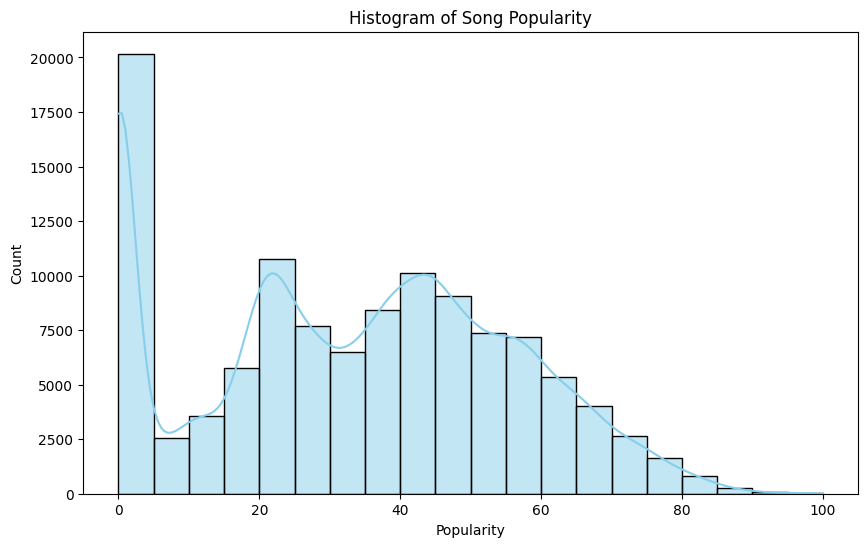

In [7]:
#Histogram of song popularity
plt.figure(figsize=(10,6))
sns.histplot(df['popularity'], bins=20, kde=True, color='skyblue')
plt.title('Histogram of Song Popularity')
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.show()

### Code Objective:
This code creates a bar chart of the top 10 most popular artists on Spotify, based on the number of songs listed in the dataset. This can help identify the most prominent artists on the platform.
This method highlights artists with a large number of songs available on Spotify.

### Code Explanation: 
- `df['artists'].value_counts()`: This part of the code counts the number of occurrences of each value in the `'artists'` column of the DataFrame df, i.e., it counts how many times each artist appears in the dataset.
- `.nlargest(10)`: Next, we use the `nlargest(10)` method to select the top 10 artists with the highest number of occurrences, i.e., the top 10 most popular artists.

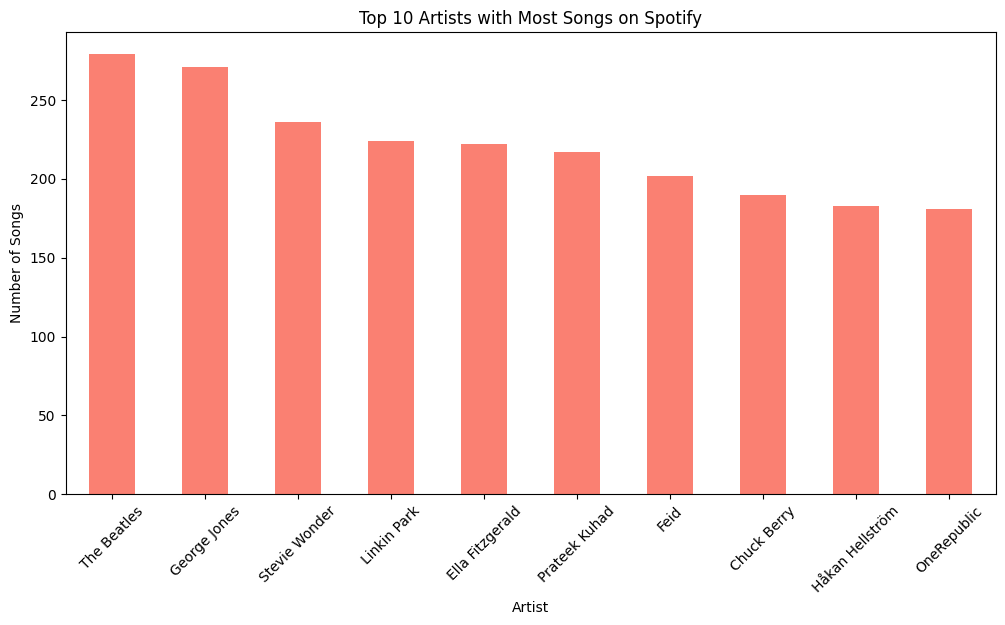

In [8]:
# Bar chart of the top 10 most popular artists
top_artists = df['artists'].value_counts().nlargest(10)

plt.figure(figsize=(12, 6))
top_artists.plot(kind='bar', color='salmon')
plt.title('Top 10 Artists with Most Songs on Spotify')
plt.xlabel('Artist')
plt.ylabel('Number of Songs')
plt.xticks(rotation=45)
plt.show()

### Code Objective:

This code creates a boxplot of the duration of songs for different music genres. This allows for comparing the duration of songs across different genres and identifying potential differences or patterns.

### Code Explanation: 

- `rotation=90`: The `rotation=90` parameter in the `plt.xticks()` function rotates the x-axis labels by 90 degrees. 
This allows the labels to be displayed vertically, which helps prevent overlap when the labels are long 
or when there are many of them. 
By rotating the labels vertically, we ensure that each label takes up less horizontal space on the plot, 
improving readability and ensuring that the labels are not overlapping.

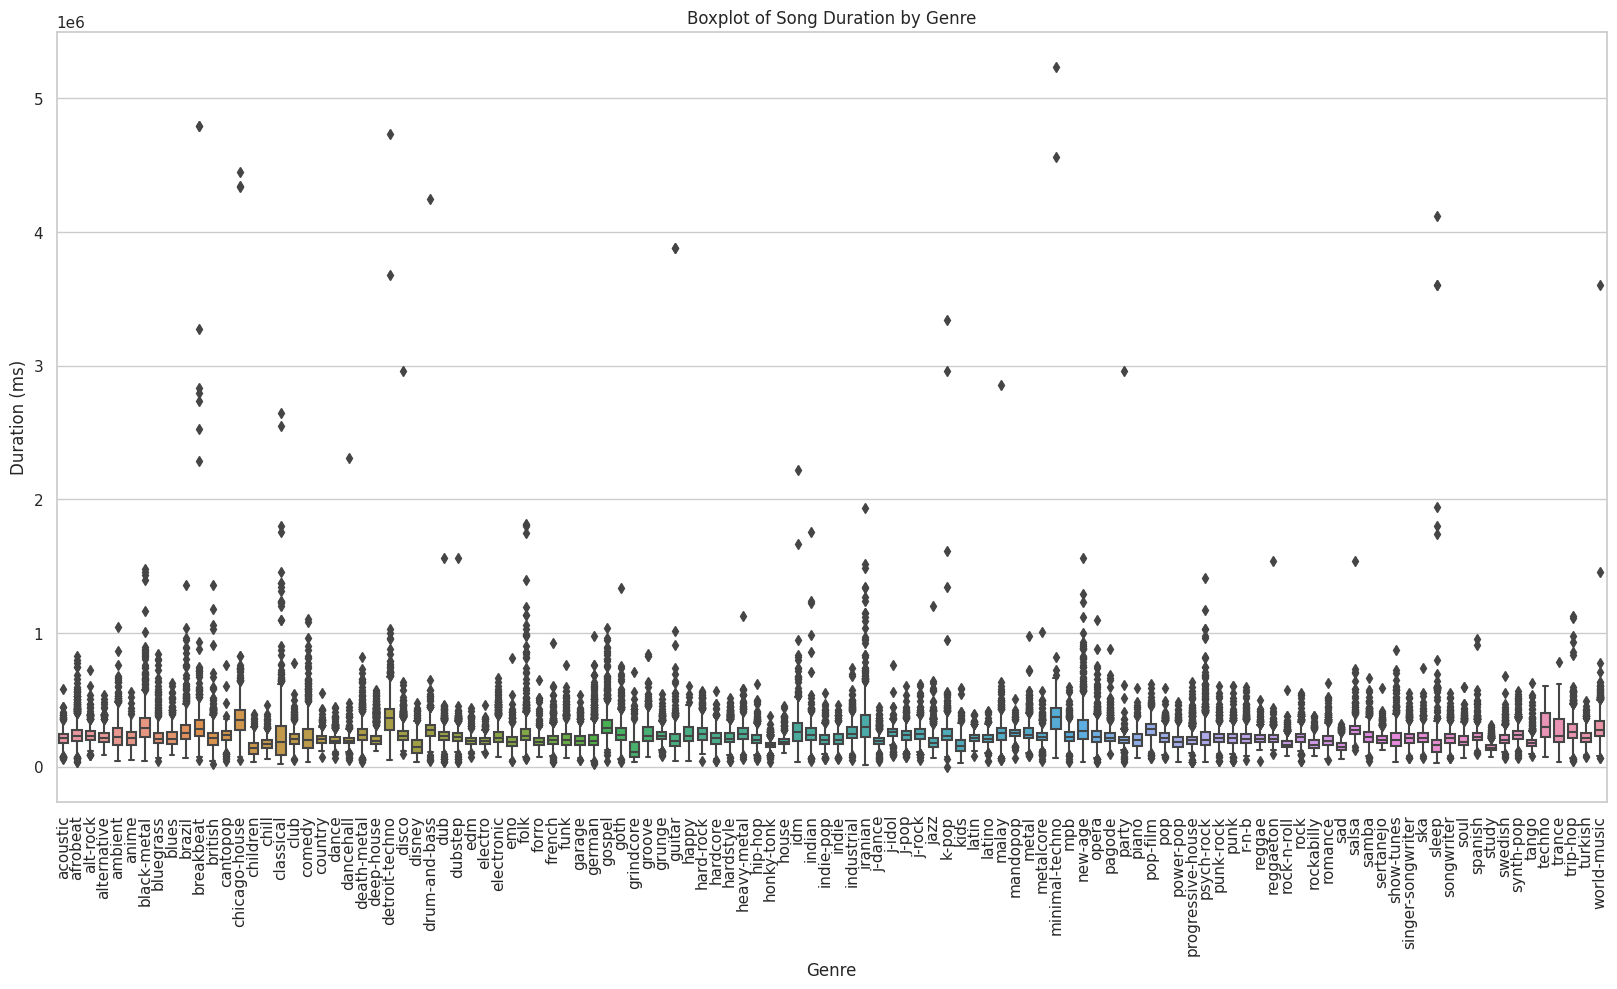

In [38]:
#Boxplot of songs duration by musical genre

plt.figure(figsize=(20,10))
sns.boxplot(x='track_genre', y='duration_ms', data=df, width=0.7, dodge=True)
plt.title('Boxplot of Song Duration by Genre')
plt.xlabel('Genre')
plt.ylabel('Duration (ms)')
plt.xticks(rotation=90) # Increase the rotation angle for better readability 
plt.show()

### Code Objective:
This code will create a scatter plot showing the relationship between the popularity of songs (on the y-axis) and their duration (on the x-axis). This will allow us to visualize if there is any correlation between the duration of songs and their popularity on Spotify.

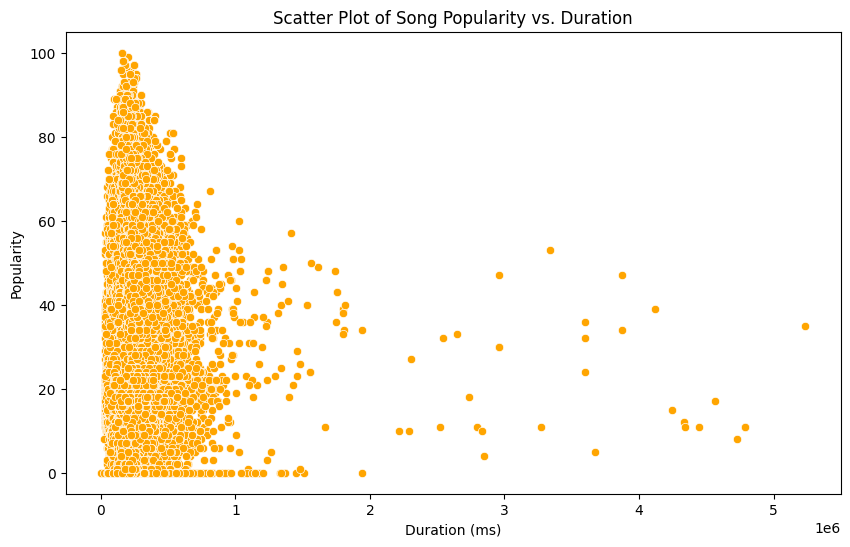

<Axes: title={'center': 'Song Duration vs. Popularity'}, xlabel='duration_ms', ylabel='popularity'>

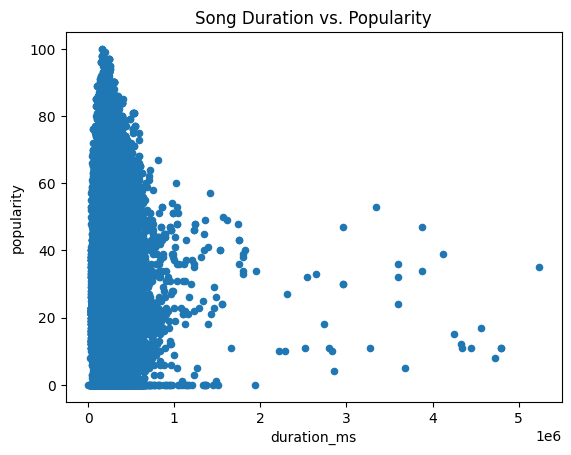

In [10]:
# Relationship between song duration and popularity

plt.figure(figsize=(10, 6))
sns.scatterplot(x='duration_ms', y='popularity', data=df, color='orange')
plt.title('Scatter Plot of Song Popularity vs. Duration')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.show()

# The first code is simpler and more straightforward, using only the basic functionalities of pandas to create the scatter plot. Both codes achieve the same goal, but the first code leverages the additional functionality of the Seaborn library to create more elaborate visualizations with less code.
df.plot.scatter(x='duration_ms', y='popularity', title='Song Duration vs. Popularity')

### Code Objective:

This code snippet aims to clean the dataset by removing rows that contain missing values in the "track_name" column. Then, it identifies the top 10 most popular songs on Spotify based on the popularity column, sorting the dataframe by popularity in descending order and selecting the top 10 songs.

Providing a list of the 10 most popular songs on Spotify, which may be useful for understanding which songs have greater visibility and impact on the platform.



In [11]:
#Remove rows with missing values in the "track_name" column
spotify_data_cleaned = df.dropna(subset=['track_name'])

# Top 10 most popular songs 
top_10_popular_songs = spotify_data_cleaned[['track_name', 'popularity']].sort_values(by='popularity', ascending=False).head(10)
print("Top 10 most popular songs on Spotify:")
print(top_10_popular_songs)

Top 10 most popular songs on Spotify:
                                  track_name  popularity
20001              Unholy (feat. Kim Petras)         100
81051              Unholy (feat. Kim Petras)         100
51664  Quevedo: Bzrp Music Sessions, Vol. 52          99
89411                             La Bachata          98
81210                        I'm Good (Blue)          98
68303                             La Bachata          98
20008                        I'm Good (Blue)          98
88410                             La Bachata          98
30003                        I'm Good (Blue)          98
67356                             La Bachata          98


### Code Objective:
This method highlights artists whose songs have a high average popularity.

In [12]:
# Remove rows with missig values in the "artists" column
spotify_data_cleaned = df.dropna(subset=['artists'])

# Top 10 most popular artists

top_10_popular_artists = spotify_data_cleaned[['artists', 'popularity']].groupby('artists').mean().sort_values(by='popularity', ascending=False).head(10)
print("\nTop 10 most popular artists on Spotify:")
print(top_10_popular_artists)


Top 10 most popular artists on Spotify:
                             popularity
artists                                
Sam Smith;Kim Petras              100.0
Bizarrap;Quevedo                   99.0
Manuel Turizo                      98.0
Bad Bunny;Chencho Corleone         97.0
Bad Bunny;Bomba Estéreo            94.5
Joji                               94.0
Beyoncé                            93.0
Harry Styles                       92.0
Rema;Selena Gomez                  92.0
Rauw Alejandro;Lyanno;Brray        91.0


### Code Objective:
This code aims to identify the top 10 most popular music genres on Spotify, based on the average popularity score of songs within each genre. This can help in understanding listeners' music preferences and in devising more effective music recommendation strategies.

### Code Explanation:
- `.groupby('genres').mean()`: Data is being grouped by musical genre (column 'genres') and the mean popularity is calculated for each group. This means that the average popularity is being computed for each musical genre.

- `.sort_values(by='popularity', ascending=False)`: The results are being sorted based on the mean popularity in descending order (from highest to lowest).

- `.head(10)`: Finally, the top 10 rows of the resulting DataFrame are selected, representing the 10 most popular musical genres on Spotify.

In [13]:
# Top 10 most popular genres

top_10_popular_genres = df[['track_genre', 'popularity']].groupby('track_genre').mean().sort_values(by='popularity',ascending=False).head(10)
print("\nTop 10 most popular genres on Spotify:")
print(top_10_popular_genres)


Top 10 most popular genres on Spotify:
             popularity
track_genre            
pop-film         59.283
k-pop            56.896
chill            53.651
sad              52.379
grunge           49.594
indian           49.539
anime            48.772
emo              48.128
sertanejo        47.866
pop              47.576


### Code Objective:
The purpose of this code is to provide an analysis of the music features that have the highest correlation with the popularity of songs on Spotify, which can help better understand what makes a song popular on the platform.

The column `track_id` is not numeric and is being included in the correlation matrix. To calculate the correlation between the music features and popularity, it is necessary to exclude the non-numeric columns.
Therefore, non-numeric columns will be excluded before calculating the correlation.
The code will select only the numeric columns from the dataset before calculating the correlation matrix, ensuring that only numeric features are included in the correlation analysis.

In [14]:
# Remove non-numeric columns before calculating correlation

numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numeric_columns].corr()

# Correlation between music features and popularity

correlation_with_popularity = correlation_matrix['popularity'].sort_values(ascending=False)
print("\nCorrelation between music features and popularity:")
print(correlation_with_popularity)


Correlation between music features and popularity:
popularity          1.000000
loudness            0.050423
danceability        0.035448
Unnamed: 0          0.032142
time_signature      0.031073
tempo               0.013205
energy              0.001056
key                -0.003853
liveness           -0.005387
duration_ms        -0.007101
mode               -0.013931
acousticness       -0.025472
valence            -0.040534
speechiness        -0.044927
instrumentalness   -0.095139
Name: popularity, dtype: float64


## Initial Questions:

### What is the distribution of song popularity?

Understanding the distribution of song popularity is important for:

- Identification of Trends and Patterns.
- Understanding the Scope of Popularity.
- Evaluation of Variability in Popularity.
- Preparation for Future Analyses.
- Support in Decision Making related to music promotion, marketing strategies, artist selection for collaborations, etc.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


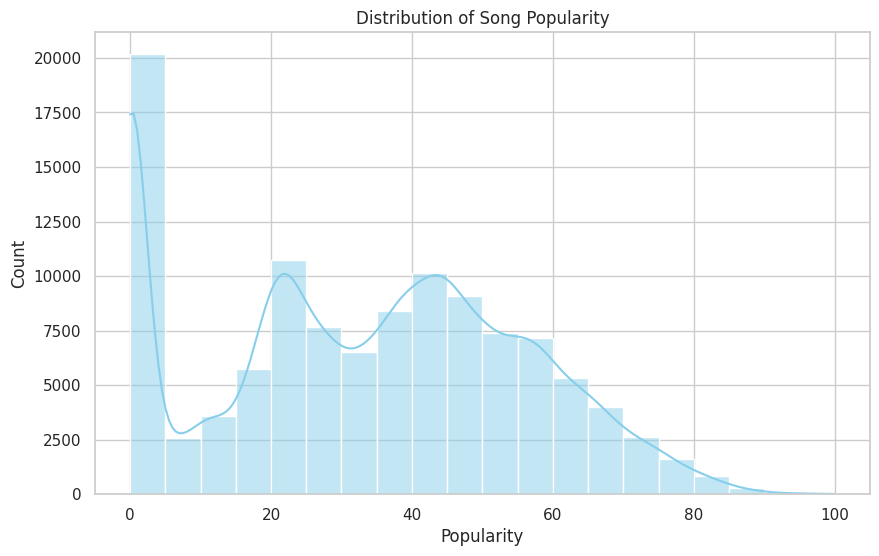

In [15]:
# What is the distribution of song popularity?

# Set seaborn style
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='popularity', bins=20, kde=True, color='skyblue')
plt.title('Distribution of Song Popularity')
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.show()

### Is there any relationship between song explicitness and its popularity?

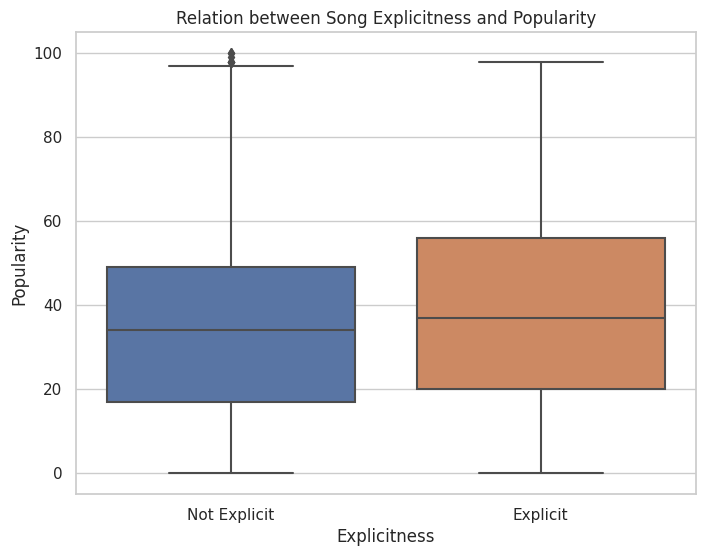

In [16]:
# Is there any relationship between song explicitness and its popularity?

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='explicit', y='popularity')
plt.title('Relation between Song Explicitness and Popularity')
plt.xlabel('Explicitness')
plt.ylabel('Popularity')
plt.xticks(ticks=[0, 1], labels=['Not Explicit', 'Explicit'])
plt.show()


### Which music genres are most diverse in terms of popularity?


The purpose of the code is to visualize the most diverse music genres in terms of popularity using a boxplot. Initially, the previously developed code generated a graph where the labels of the music genres were overlapped, making interpretation difficult and rendering the visualization confusing.

To improve the readability of the graph, the following changes were implemented:

- Data Filtering: Instead of plotting all genres present in the dataset, the code filters the data to include only the top 10 genres with the highest average popularity. This reduces the number of genres in the graph, making it clearer and focused on the most relevant genres in terms of popularity.

- Rotation of Labels: The labels of genres on the y-axis were rotated at a 45-degree angle. This helps to avoid label overlapping and improves readability, allowing the labels to be displayed more spaced out and clearly.

These changes result in a cleaner and more readable graph, highlighting the most popular music genres more effectively. The code is structured to provide a more informative and understandable visualization of music genres in relation to their popularity on Spotify.

/tmp/ipykernel_32/4061097845.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=45, horizontalalignment='right')


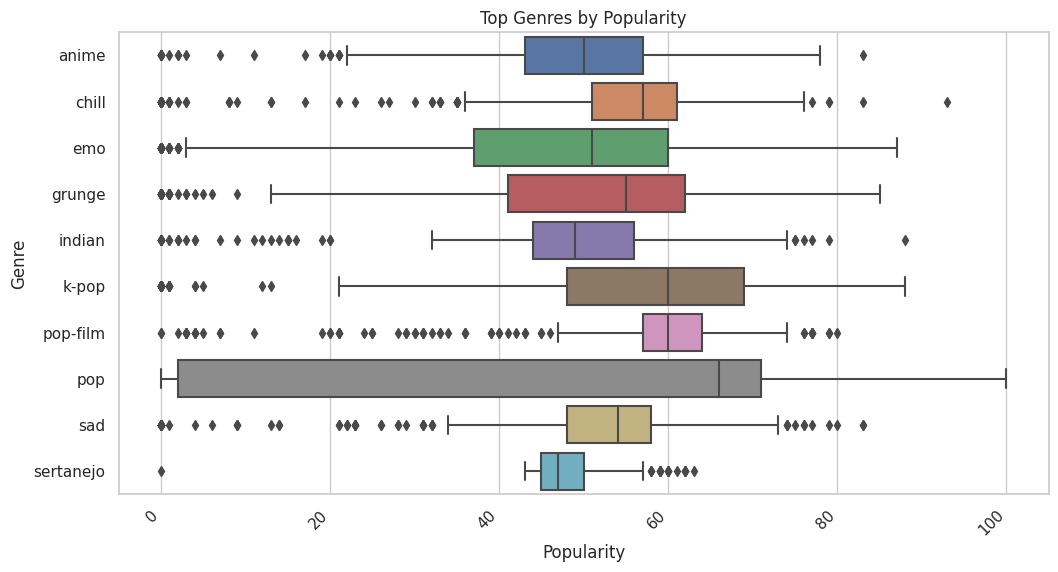

In [17]:
# Which music genres are most diverse in terms of popularity?

# Calculate the mean popularity for each genre
genre_popularity = df.groupby('track_genre')['popularity'].mean().sort_values(ascending=False)

# Select the top 10 genres with highest mean popularity
top_10_genres = genre_popularity.head(10)

# Filter the dataset to include only the top 10 genres
filtered_data = df[df['track_genre'].isin(top_10_genres.index)]

# Plot the boxplot for the filtered data
plt.figure(figsize=(12, 6))
boxplot = sns.boxplot(data=filtered_data, x='popularity', y='track_genre')
plt.title('Top Genres by Popularity')
plt.xlabel('Popularity')
plt.ylabel('Genre')

# Rotating y-axis labels
boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()



### What are the most common music features in popular songs?

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

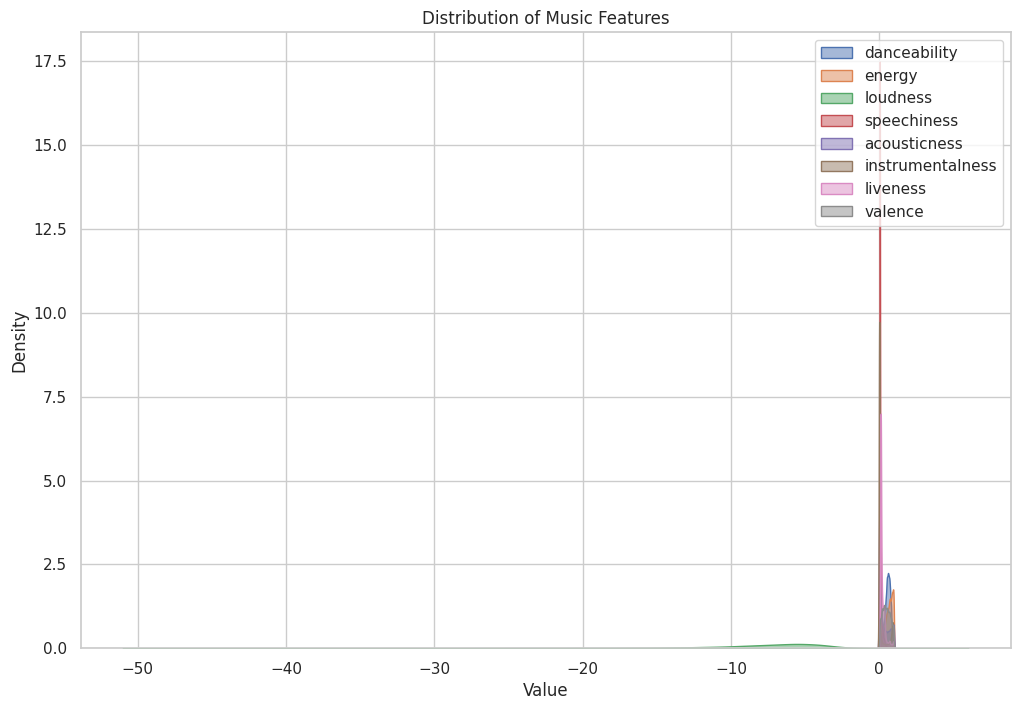

In [18]:
# What are the most common music features in popular songs?

features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']
plt.figure(figsize=(12, 8))
for feature in features:
    sns.kdeplot(data=df, x=feature, fill=True, alpha=0.5, label=feature)
plt.title('Distribution of Music Features')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()


### What is the relationship between the duration of songs and other musical characteristics?

The analysis of the correlation between the duration of songs and other musical characteristics serves to better understand how the duration of a song relates to its other features, thus providing valuable insights for various aspects of the music industry, from music composition and production to understanding listener preferences and the success of songs.

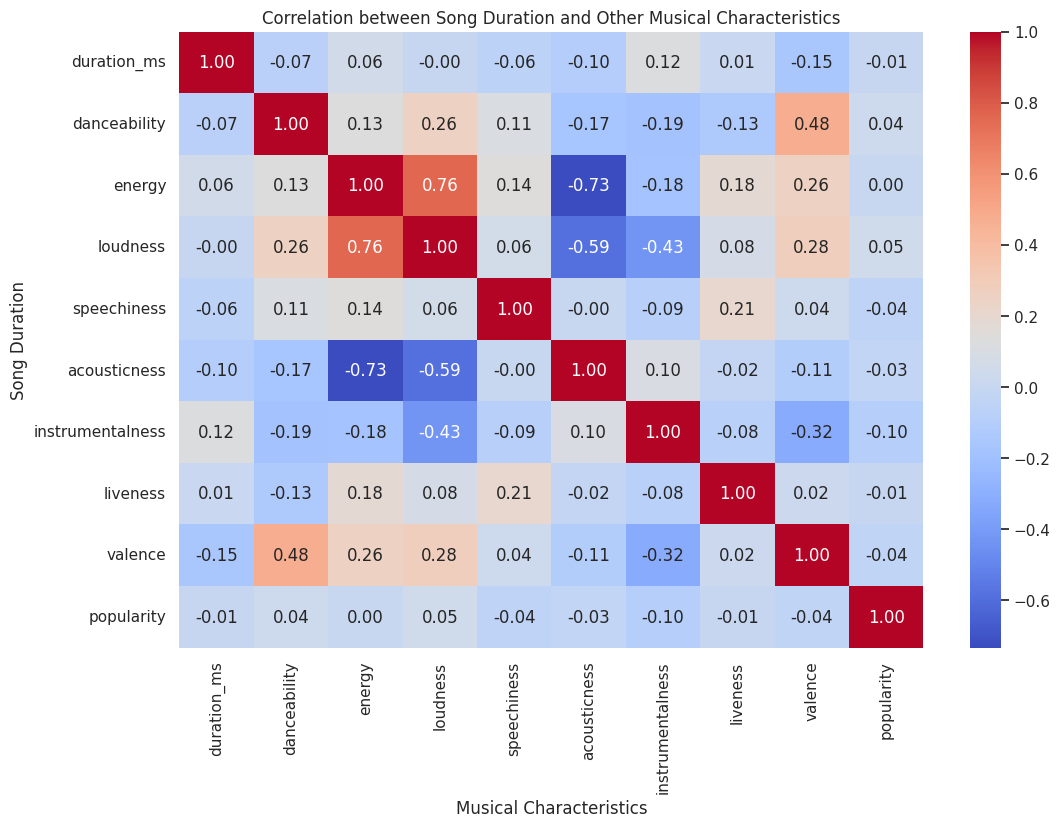

In [42]:
# What is the relationship between the duration of songs and other musical characteristics?

plt.figure(figsize=(12, 8))
duration_corr = df[['duration_ms', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'popularity']].corr()
sns.heatmap(duration_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Song Duration and Other Musical Characteristics')
plt.xlabel('Musical Characteristics')  
plt.ylabel('Song Duration') 
plt.show()


## Exploring Musical Features:

The goal of this section is to explore the musical features provided in the dataset, such as duration, danceability, energy, mode, acousticness, etc. This exploration can help understand what makes a song popular on Spotify and which features have the greatest impact on its popularity.


### Code Explanation:

- The `plt.subplot()` function is used to create a grid of subplots for each musical feature.
- The `sns.histplot()` function is used to plot a histogram for each feature.
- The `kde=True` option adds a kernel density estimate to the histogram.
- The title of each subplot is capitalized using `plt.title(feature.capitalize())`.
`plt.tight_layout()` is used to automatically adjust the subplots to avoid overlap.


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

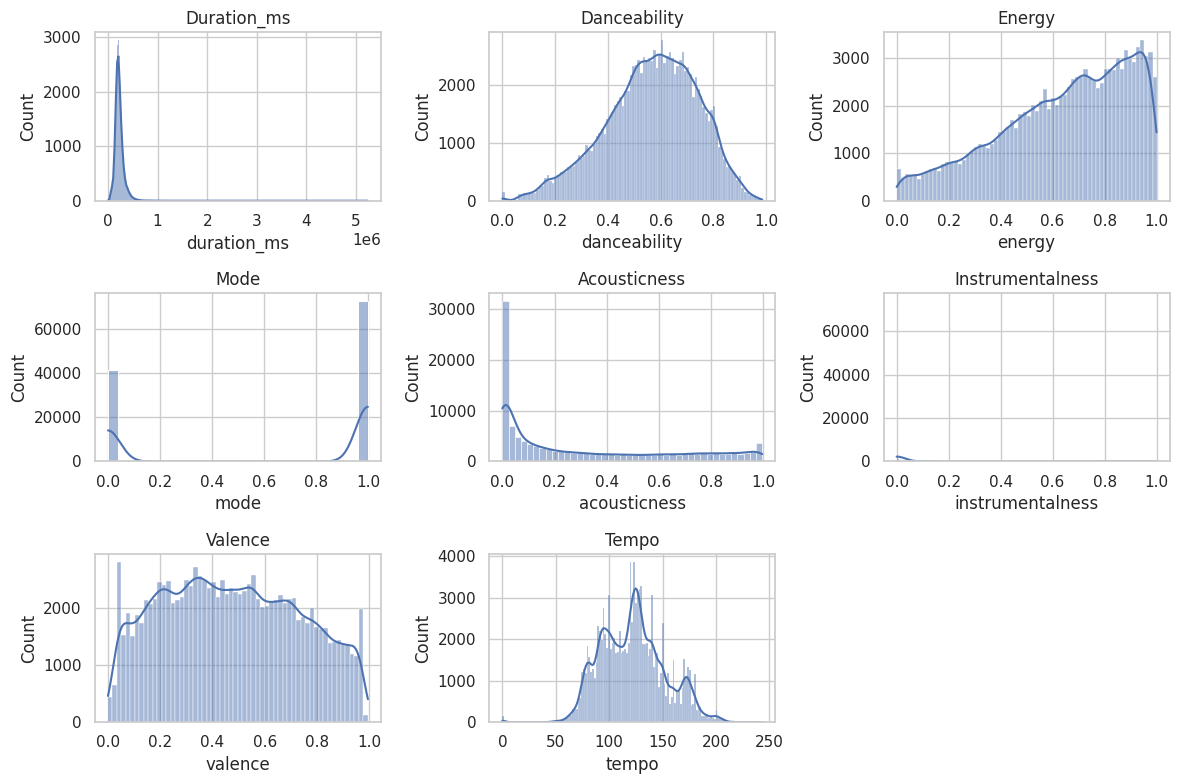

In [25]:
# Explore music features
features = ['duration_ms', 'danceability', 'energy', 'mode', 'acousticness',
            'instrumentalness', 'valence', 'tempo']


# Plot histograms for music features
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[feature], kde=True)
    plt.title(feature.capitalize())  # Capitalize feature name
plt.tight_layout()
plt.show()


## Identification of Outliers and Anomalies:

Search for outliers and anomalies in the data that may require further investigation or treatment during the analysis.

For the "Identification of Outliers and Anomalies" step, I've decided to leave the following two code snippets in the notebook. This way, there will be two different approaches to identify outliers.
Cell 1 uses boxplots to identify outliers, while cell 2 calculates outliers based on the IQR (Interquartile Range) method.

**Cell 1:**

- Pros: Boxplots provide a visual representation of the data, allowing for quick identification of outliers in each column.
- Cons: Boxplots may not be as precise as the IQR method for identifying outliers, especially in datasets with a large number of extreme values.

**Cell 2:**

- Pros: The IQR method is a robust statistical approach for identifying outliers and performs well in datasets with non-normal distributions.
- Cons: It does not provide a direct visual representation of outliers, making it more difficult to identify patterns or trends in the data.

### Code Explanation:

**Loop for Iteration:**

`for column in numerical_columns`:
- This is a loop that iterates over each numerical column (column) in the list of numerical columns (`numerical_columns`) using a for loop. In other words, in each iteration of the loop, a new numerical column is selected for the creation of a boxplot.

**Creating Boxplots:**

`df.boxplot(column)`: 
- For each column, this command creates a boxplot using the `boxplot` function of the pandas DataFrame. A boxplot is a visualization that displays the distribution of data, including quartiles, outliers, and the median.





Missing Values:
Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


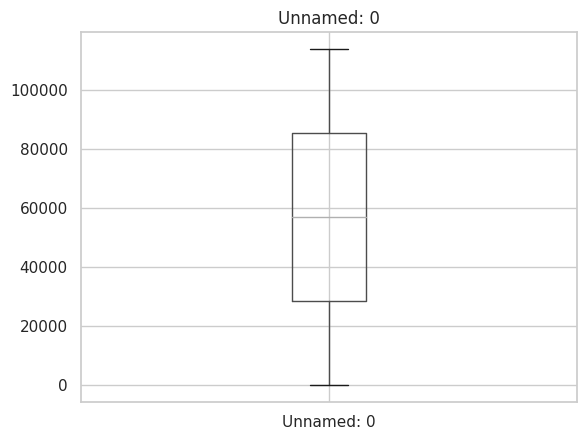

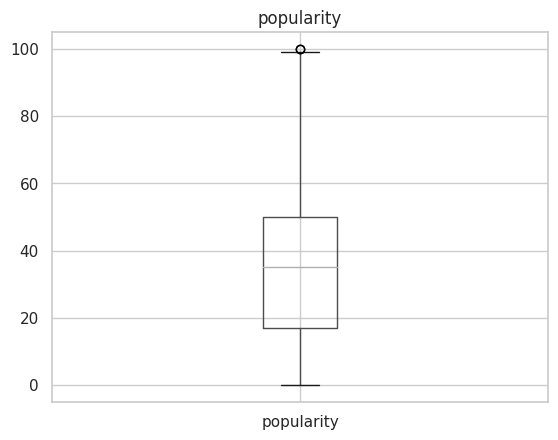

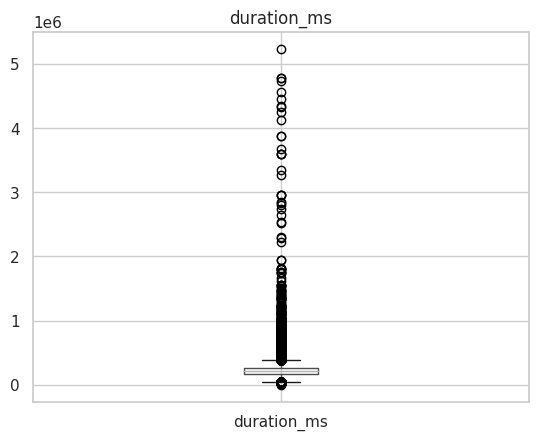

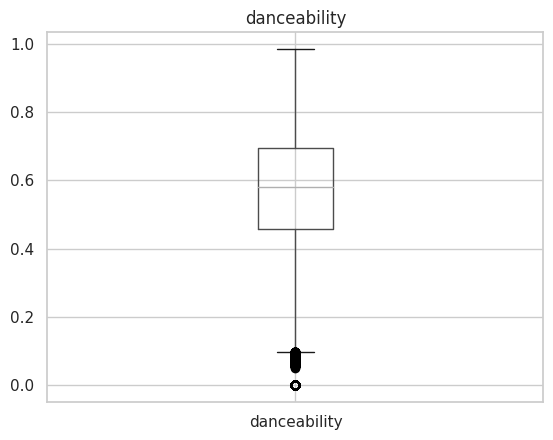

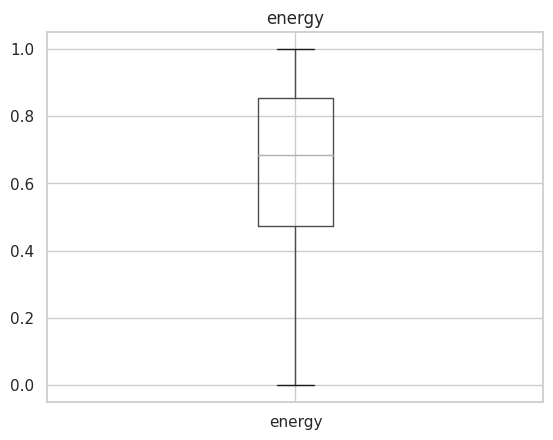

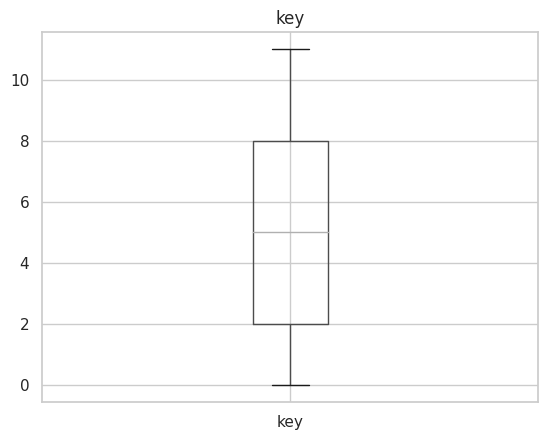

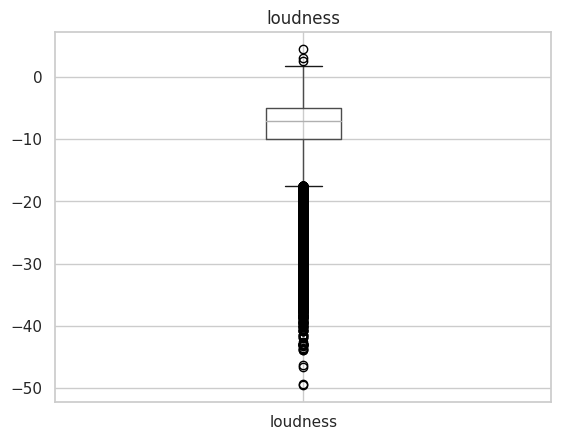

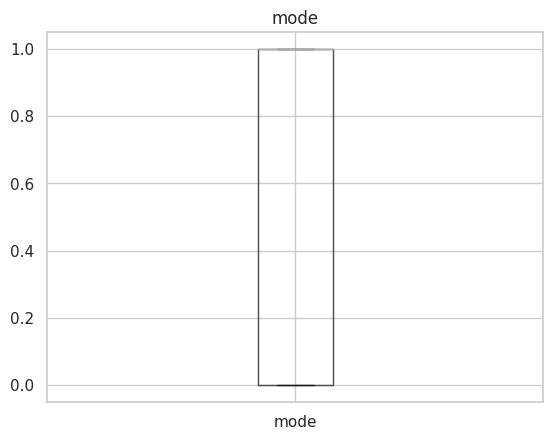

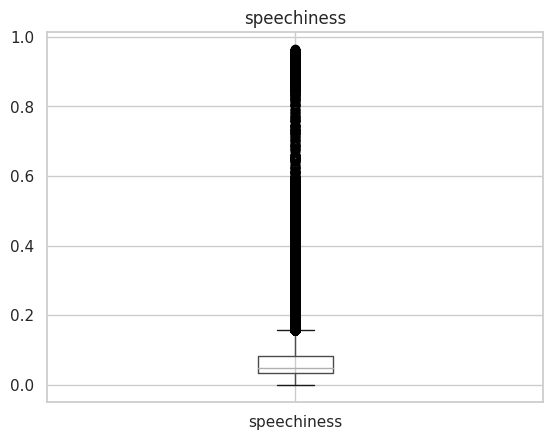

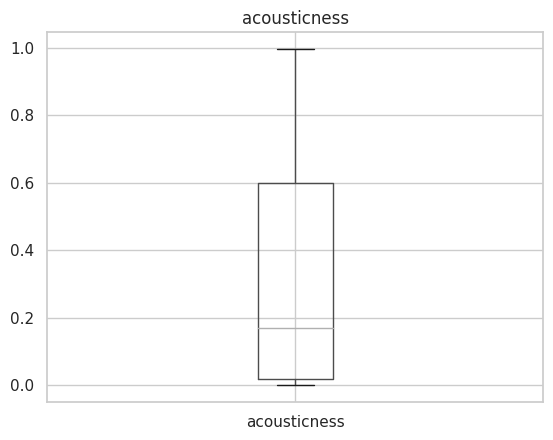

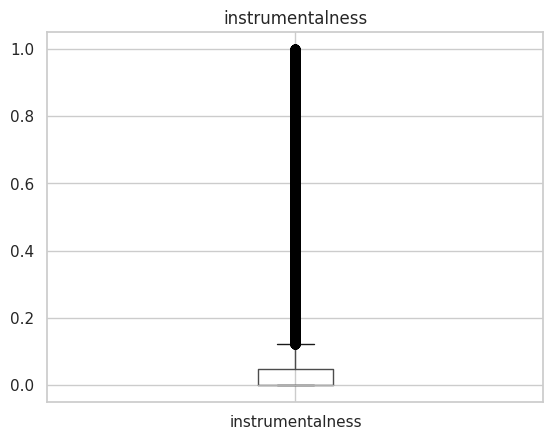

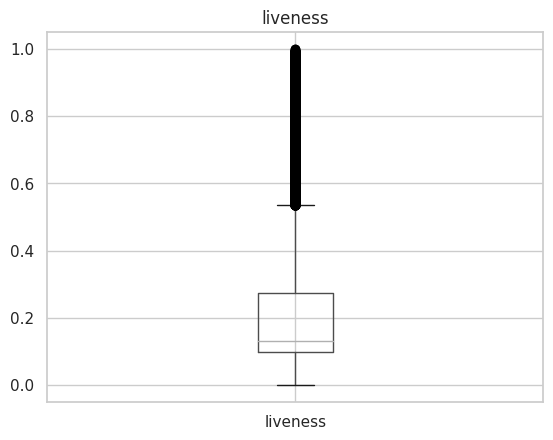

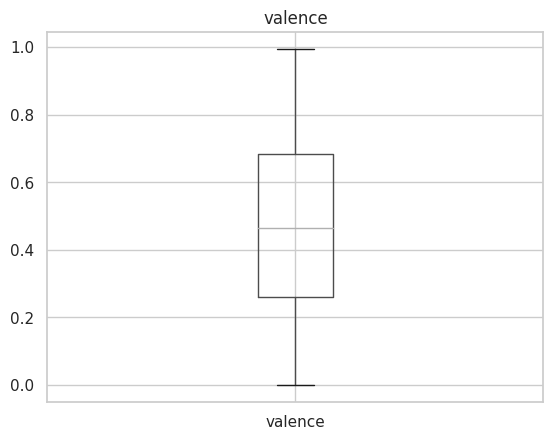

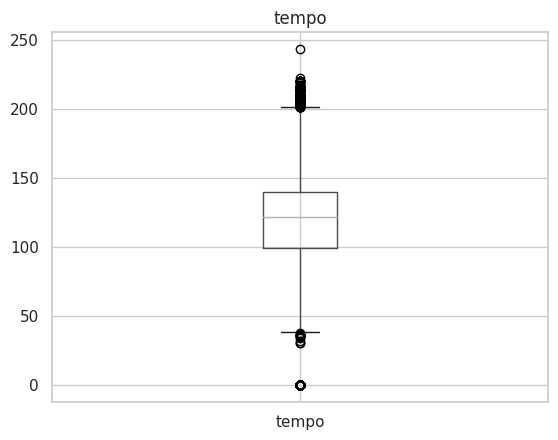

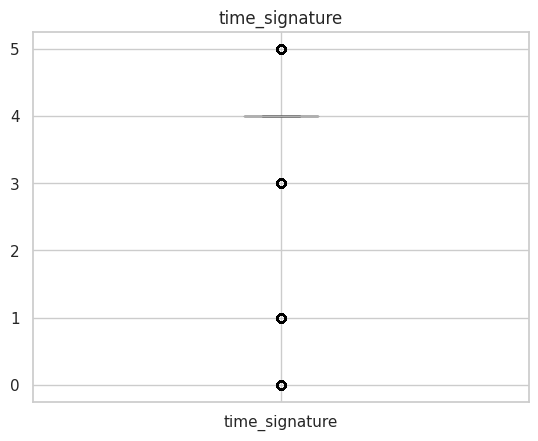

In [26]:
# Identification of Outliers and Anomalies

# Check for missing values in each column
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

# Identify outliers using boxplots for numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
for column in numerical_columns:
    df.boxplot(column)
    plt.title(column)
    plt.show()


In [22]:
# Identification of Outliers and Anomalies

# Checking for missing values
print(df.isnull().sum())

# Identifying outliers in numerical columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
for column in numeric_columns:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f'Outliers in column {column}: {outliers}')

# Note: As there are missing values in some variables, it's important to consider this when identifying outliers.)
# If a column has many missing values, it may not be a good candidate for identifying outliers.)


Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64
Outliers in column Unnamed: 0: Empty DataFrame
Columns: [Unnamed: 0, track_id, artists, album_name, track_name, popularity, duration_ms, explicit, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, time_signature, track_genre]
Index: []

[0 rows x 21 columns]
Outliers in column popularity:        Unnamed: 0                track_id               artists  \
20001       20001  3nqQXoyQOWXiESFLlDF1hG  Sam Smith;Kim Petras   
81051       81051  3nqQXoyQOWXiESFLlD